<a href="https://colab.research.google.com/github/AbduallahGamal/FIFAPredictions/blob/main/FIFAPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#load data 
world_cup = pd.read_csv('/content/World Cup 2018 Dataset.csv')
results = pd.read_csv('/content/results.csv')
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [13]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range(len(results['home_team'])):
  if results['home_score'][i] > results['away_score'][i]:
    winner.append(results['home_team'][i])
  elif results['home_score'][i] < results['away_score'][i]:
    winner.append(results['away_team'][i])
  else:
    winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


In [31]:
# lets work with a subset of the data one that includes games played by Egypt in a Egypt dataframe
dataframe = results[(results['home_team'] == 'Egypt') | (results['away_team'] == 'Egypt')]
Egypt = dataframe.iloc[:]
Egypt.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
781,1924-05-27,Egypt,Lithuania,10,0,Friendly,Vincennes,France,Egypt,10
790,1924-06-22,Austria,Egypt,3,1,Friendly,Vienna,Austria,Austria,2
795,1924-06-29,Sweden,Egypt,5,0,Friendly,Stockholm,Sweden,Sweden,5
1108,1928-06-14,Netherlands,Egypt,1,2,Friendly,Rotterdam,Netherlands,Egypt,1
1110,1928-06-28,Luxembourg,Egypt,1,1,Friendly,Esch-sur-Alzette,Luxembourg,Draw,0


In [37]:
#creating a column for year and the first world cup was held in 1930
year = []
for row in Egypt['date']:
    year.append(int(row[:4]))
Egypt ['match_year']= year
Egypt_1930 = Egypt[Egypt.match_year >= 1930]
Egypt_1930.count()

date               605
home_team          605
away_team          605
home_score         605
away_score         605
tournament         605
city               605
country            605
winning_team       605
goal_difference    605
match_year         605
dtype: int64

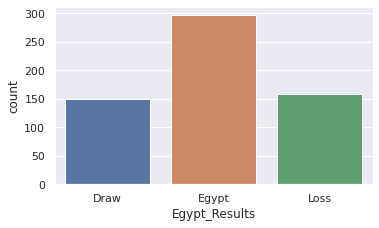

In [46]:
#what is the common game outcome for nigeria visualisation
wins = []
for row in Egypt_1930['winning_team']:
    if row != 'Egypt' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=['Egypt_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(5.7, 3.27)
sns.set(style='darkgrid')
sns.countplot(x='Egypt_Results', data=winsdf)

In [47]:
# Narrowing to team patcipating in the world cup
worldcup_teams = ['Australia', 'Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               21040
home_team          21040
away_team          21040
home_score         21040
away_score         21040
tournament         21040
city               21040
country            21040
winning_team       21040
goal_difference    21040
dtype: int64

In [50]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,England,1
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,England,1


In [51]:
#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
1230,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,Spain,1,1930
1231,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,Portugal,1,1930
1237,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,Portugal,2,1930
1238,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,Italy,2,1930
1240,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,Draw,0,1930


In [52]:
# Dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,winning_team
1,England,Scotland,England
3,England,Scotland,Draw
6,England,Scotland,Scotland
10,England,Wales,England
11,England,Scotland,England


In [54]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,winning_team
0,England,Scotland,2
1,England,Scotland,1
2,England,Scotland,0
3,England,Wales,2
4,England,Scotland,2


In [55]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
final.head(2)

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia-Herzegovina,home_team_Botswana,home_team_Brazil,home_team_Brunei,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burma,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cape Verde,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China,home_team_Colombia,home_team_Congo,...,away_team_Solomon Islands,away_team_South Africa,away_team_Spain,away_team_Sri Lanka,away_team_St Kitts and Nevis,away_team_St Lucia,away_team_St Vincent and the Grenadines,away_team_Sudan,away_team_Suriname,away_team_Swaziland,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Taiwan,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_USA,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.4f'%(score))
print("Test set accuracy: ", '%.4f'%(score2))

Training set accuracy:  0.5723
Test set accuracy:  0.5642


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
# Adding Fifa rankings
# The team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
# And therefore, will be positioned under the "home_teams" column
# Since there are no "home" or "away" teams in World Cup games. 

# Loading new datasets
ranking = pd.read_csv('/content/fifa_rankings.csv') 
fixtures = pd.read_csv('/content/fixtures.csv')

# List for storing the group stage games
pred_set = []

In [69]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6.0,25.0,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,NaN
44,3,60.0,10.0,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,NaN
45,3,28.0,16.0,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,NaN
46,3,55.0,14.0,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,NaN
47,3,13.0,3.0,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,NaN


In [70]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,home_team,away_team,winning_team
0,Russia,Saudi Arabia,None
1,Uruguay,Egypt,None
2,Iran,Morocco,None
3,Portugal,Spain,None
4,France,Australia,None


In [71]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia-Herzegovina,home_team_Botswana,home_team_Brazil,home_team_Brunei,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burma,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cape Verde,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China,home_team_Colombia,home_team_Congo,home_team_Congo DR,...,away_team_Solomon Islands,away_team_South Africa,away_team_Spain,away_team_Sri Lanka,away_team_St Kitts and Nevis,away_team_St Lucia,away_team_St Vincent and the Grenadines,away_team_Sudan,away_team_Suriname,away_team_Swaziland,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Taiwan,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_USA,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
# Group matches 
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")

Saudi Arabia and Russia
Winner: Saudi Arabia
Probability of Saudi Arabia winning:  0.699
Probability of Draw:  0.213
Probability of Russia winning:  0.088

Egypt and Uruguay
Winner: Egypt
Probability of Egypt winning:  0.637
Probability of Draw:  0.285
Probability of Uruguay winning:  0.077

Morocco and Iran
Winner: Morocco
Probability of Morocco winning:  0.386
Probability of Draw:  0.326
Probability of Iran winning:  0.288

Spain and Portugal
Draw
Probability of Spain winning:  0.315
Probability of Draw:  0.358
Probability of Portugal winning:  0.327

Australia and France
Winner: Australia
Probability of Australia winning:  0.627
Probability of Draw:  0.227
Probability of France winning:  0.146

Iceland and Argentina
Winner: Iceland
Probability of Iceland winning:  0.880
Probability of Draw:  0.092
Probability of Argentina winning:  0.027

Denmark and Peru
Winner: Peru
Probability of Denmark winning:  0.394
Probability of Draw:  0.159
Probability of Peru winning:  0.447

Nigeria and 

In [74]:
# List of tuples before 
group_16 = [('Uruguay', 'Portugal'),
            ('France', 'Croatia'),
            ('Brazil', 'Mexico'),
            ('England', 'Colombia'),
            ('Spain', 'Russia'),
            ('Argentina', 'Peru'),
            ('Germany', 'Switzerland'),
            ('Poland', 'Belgium')]

In [75]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [76]:
clean_and_predict(group_16, ranking, final, logreg)

Uruguay and Portugal
Winner: Uruguay
Probability of Uruguay winning:  0.441
Probability of Draw:  0.284
Probability of Portugal winning:  0.275

Croatia and France
Winner: Croatia
Probability of Croatia winning:  0.470
Probability of Draw:  0.220
Probability of France winning:  0.310

Mexico and Brazil
Winner: Mexico
Probability of Mexico winning:  0.708
Probability of Draw:  0.198
Probability of Brazil winning:  0.094

Colombia and England
Winner: Colombia
Probability of Colombia winning:  0.506
Probability of Draw:  0.370
Probability of England winning:  0.124

Russia and Spain
Winner: Russia
Probability of Russia winning:  0.497
Probability of Draw:  0.291
Probability of Spain winning:  0.213

Peru and Argentina
Winner: Peru
Probability of Peru winning:  0.702
Probability of Draw:  0.231
Probability of Argentina winning:  0.066

Switzerland and Germany
Winner: Switzerland
Probability of Switzerland winning:  0.682
Probability of Draw:  0.204
Probability of Germany winning:  0.115

P

In [77]:
# List of matches
quarters = [('Spain', 'France'),
            ('Portugal', 'Argentina'),
            ('Brazil', 'England'),
            ('Germany', 'Belgium')]

In [78]:
clean_and_predict(quarters, ranking, final, logreg)


Spain and France
Winner: Spain
Probability of Spain winning:  0.367
Probability of Draw:  0.267
Probability of France winning:  0.366

Argentina and Portugal
Draw
Probability of Argentina winning:  0.338
Probability of Draw:  0.339
Probability of Portugal winning:  0.324

England and Brazil
Winner: England
Probability of England winning:  0.495
Probability of Draw:  0.254
Probability of Brazil winning:  0.250

Belgium and Germany
Winner: Belgium
Probability of Belgium winning:  0.581
Probability of Draw:  0.256
Probability of Germany winning:  0.163



In [79]:
# List of matches
semi = [('France', 'Brazil'),
        ('Argentina', 'Germany')]

In [80]:
clean_and_predict(semi, ranking, final, logreg)


France and Brazil
Winner: France
Probability of France winning:  0.652
Probability of Draw:  0.194
Probability of Brazil winning:  0.154

Argentina and Germany
Winner: Argentina
Probability of Argentina winning:  0.428
Probability of Draw:  0.292
Probability of Germany winning:  0.280



In [81]:
# Finals
finals = [('Brazil', 'Germany')]

In [82]:
clean_and_predict(finals, ranking, final, logreg)

Brazil and Germany
Winner: Germany
Probability of Brazil winning:  0.342
Probability of Draw:  0.268
Probability of Germany winning:  0.389

